In [1]:
from meld_classifier.paths import BASE_PATH, EXPERIMENT_PATH
from meld_classifier.meld_cohort import MeldCohort, MeldSubject
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import potpourri3d as pp3d


Setting MELD_DATA_PATH to /rds/user/kw350/rds-kw350-meld/meld_data/Data/
Setting BASE_PATH to /rds/user/kw350/rds-kw350-meld/meld_data/Data/
Setting EXPERIMENT_PATH to /rds/user/kw350/rds-kw350-meld/experiments/kw350/
No fs_subjects_path defined in /home/kw350/software/meld_classifier/meld_config.ini!


In [12]:
site_codes=['H2', 'H3','H4','H5','H6','H7','H9','H10','H11','H12','H14','H15','H16','H17','H18','H19',
                  'H21','H23','H24','H26']
c= MeldCohort(hdf5_file_root='{site_code}_{group}_featurematrix.hdf5', dataset=None)
listids = c.get_subject_ids(site_codes=site_codes, group='both', lesional_only=True)

In [24]:
random_subjects  = np.random.choice(listids,20)

In [25]:
s = MeldSubject(random_subjects[0],cohort=c)

In [26]:
s.get_feature_list()

['.inter_z.asym.on_lh.curv.mgh',
 '.inter_z.asym.on_lh.intra_z.gm_FLAIR_0.25.sm10.mgh',
 '.inter_z.asym.on_lh.intra_z.gm_FLAIR_0.5.sm10.mgh',
 '.inter_z.asym.on_lh.intra_z.gm_FLAIR_0.75.sm10.mgh',
 '.inter_z.asym.on_lh.intra_z.gm_FLAIR_0.sm10.mgh',
 '.inter_z.asym.on_lh.intra_z.pial.K_filtered.sm20.mgh',
 '.inter_z.asym.on_lh.intra_z.thickness.sm10.mgh',
 '.inter_z.asym.on_lh.intra_z.w-g.pct.sm10.mgh',
 '.inter_z.asym.on_lh.intra_z.wm_FLAIR_0.5.sm10.mgh',
 '.inter_z.asym.on_lh.intra_z.wm_FLAIR_1.sm10.mgh',
 '.inter_z.asym.on_lh.sulc.mgh',
 '.inter_z.on_lh.curv.mgh',
 '.inter_z.on_lh.intra_z.gm_FLAIR_0.25.sm10.mgh',
 '.inter_z.on_lh.intra_z.gm_FLAIR_0.5.sm10.mgh',
 '.inter_z.on_lh.intra_z.gm_FLAIR_0.75.sm10.mgh',
 '.inter_z.on_lh.intra_z.gm_FLAIR_0.sm10.mgh',
 '.inter_z.on_lh.intra_z.pial.K_filtered.sm20.mgh',
 '.inter_z.on_lh.intra_z.thickness.sm10.mgh',
 '.inter_z.on_lh.intra_z.w-g.pct.sm10.mgh',
 '.inter_z.on_lh.intra_z.wm_FLAIR_0.5.sm10.mgh',
 '.inter_z.on_lh.intra_z.wm_FLAIR_1.sm10

In [27]:
features=['.on_lh.curv.mgh',
 '.on_lh.gm_FLAIR_0.25.mgh',
 '.on_lh.gm_FLAIR_0.5.mgh',
 '.on_lh.gm_FLAIR_0.75.mgh',
 '.on_lh.gm_FLAIR_0.mgh',
 '.on_lh.pial.K_filtered.sm20.mgh',
 '.on_lh.sulc.mgh',
 '.on_lh.thickness.mgh',
 '.on_lh.w-g.pct.mgh',
 '.on_lh.wm_FLAIR_0.5.mgh',
 '.on_lh.wm_FLAIR_1.mgh']

In [47]:
feature_vals=[]
for subject in random_subjects:
    s = MeldSubject(subject,cohort=c)
    for hemi in ['lh','rh']:
        v,n=s.load_feature_lesion_data(features,hemi=hemi)
        feature_vals.append(v[c.cortex_mask])

In [48]:
feature_vals=np.vstack(feature_vals)

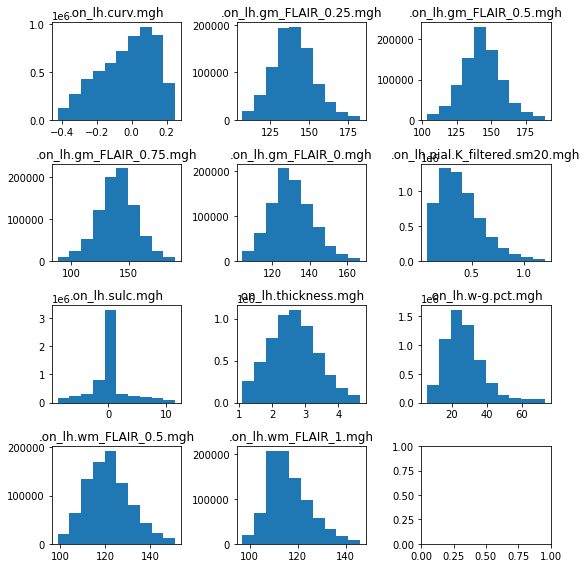

In [63]:
fig,axes = plt.subplots(4,3,figsize=(8,8))
axes=axes.ravel()
for fi,f in enumerate(features):
    if 'FLAIR' in f:
        filt = feature_vals[:,fi]!=0
        axes[fi].hist(feature_vals[filt,fi],range = (np.percentile(feature_vals[filt,fi],1),
                                             np.percentile(feature_vals[filt,fi],99)))
    else:
        axes[fi].hist(feature_vals[:,fi],range = (np.percentile(feature_vals[:,fi],1),
                                             np.percentile(feature_vals[:,fi],99)))
    axes[fi].set_title(f)
plt.tight_layout()

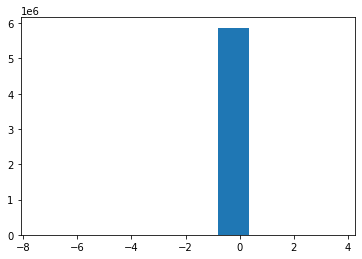

In [53]:
#centiles by existing data then clip (e.g. for missing FLAIR)
# rescale sulcal depth

In [61]:
faces=c.surf['faces']

In [62]:
def faces_to_connectivity():
    #function already in meld_classifier

(327680, 3)

In [66]:
c.adj_mat

<163842x163842 sparse matrix of type '<class 'numpy.uint8'>'
	with 983040 stored elements in Compressed Sparse Row format>

In [ ]:
# downsampling mesh
# rescaling features